In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('uber.csv',parse_dates=['pickup_datetime'])

In [3]:
data.sample(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
33943,48331172,2014-07-14 20:49:14.0000001,13.5,2014-07-14 20:49:14+00:00,-73.990871,40.755843,-73.951425,40.779509,1
98566,21168255,2011-08-09 18:15:00.000000183,5.3,2011-08-09 18:15:00+00:00,-73.960560,40.761503,-73.957158,40.774797,1
120813,50073390,2013-08-07 23:57:06.0000003,15.5,2013-08-07 23:57:06+00:00,-73.977198,40.764962,-74.008140,40.715864,1
192809,48504462,2015-06-29 19:20:16.0000003,12.0,2015-06-29 19:20:16+00:00,-73.985023,40.724232,-73.969620,40.759506,1
174297,8674896,2012-09-03 02:53:17.0000001,6.9,2012-09-03 02:53:17+00:00,-73.954904,40.707728,-73.988761,40.718879,1


In [4]:
data.dtypes

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [5]:
data1=data.drop(['key','Unnamed: 0',],axis=1)

In [6]:
data1.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
data1.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
data1.dropna(inplace=True)

In [9]:
data1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
#latitude value should be between -90 to 90
#longitude value should be between -180 to 180
data1=data1[(data1['pickup_latitude']>=-90) & (data1['pickup_latitude']<=90)] 
data1=data1[(data1['dropoff_latitude']>=-90) & (data1['dropoff_latitude']<=90)]
data1=data1[(data1['pickup_longitude']>=-180) & (data1['pickup_longitude']<=180)]
data1=data1[(data1['dropoff_longitude']>=-180) & (data1['dropoff_longitude']<=180)]

In [11]:
#passenger_count has value 208 which doesn't make sense
data1[data1['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208


In [12]:
data1=data1[data1['passenger_count']<=6]


#### Let's Use Haversine formula to calculate the distance between two point on a sphere.
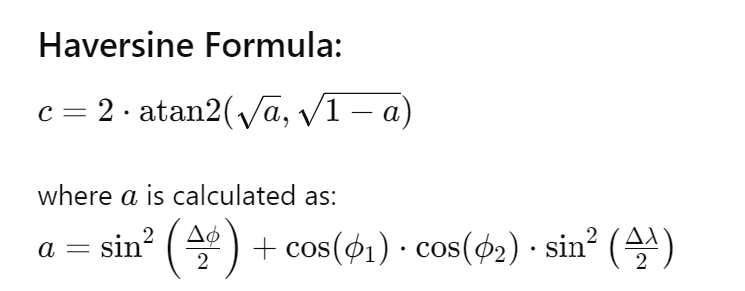
#### distance=c*r
#### where r is radius of earth (we will use radius in mile)

In [13]:
import math

def haversine(lon1,lat1,lon2,lat2):
    #convert the cordinates into radion
    long1,lati1,long2,lati2=map(math.radians,[lon1,lat1,lon2,lat2])
    
    dlon=long2-long1
    dlat=lati2-lati1

    a=math.sin(dlat/2)**2+math.cos(lati1)*math.cos(lati2)*math.sin(dlon/2)**2
    c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
    r=3959 #in miles
    distance=c*r
    return distance


data1['distance(miles)'] = data1.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [14]:
data1[data1['distance(miles)']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance(miles)
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.0
7,2.5,2012-12-11 13:52:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0
11,8.5,2011-05-23 22:15:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0
48,56.8,2013-01-03 22:24:41+00:00,-73.993498,40.764686,-73.993498,40.764686,1,0.0
65,6.0,2014-05-05 19:27:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0
...,...,...,...,...,...,...,...,...
199880,6.5,2014-02-22 06:45:46+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0
199883,12.5,2012-09-10 17:39:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0
199917,4.5,2013-06-24 22:17:43+00:00,-73.793768,40.656939,-73.793768,40.656939,1,0.0
199932,24.9,2011-03-22 13:59:00+00:00,-73.974618,40.756295,-73.974618,40.756295,5,0.0


In [15]:
data1=data1[data1['distance(miles)']>0] #removing distance<=0
data1=data1[data1['fare_amount']>0]   #removing fare<=0

In [16]:
# car_type1={'UberX':0,'UberXL':1}
# data1['car_type']=data1.passenger_count.apply(lambda x: car_type1['UberX'] if x<=4 else car_type1['UberXL'])
# data1.head(5)

In [17]:
data1['pickup_year']=data1['pickup_datetime'].dt.year
data1['pickup_hour']=data1['pickup_datetime'].dt.hour
from datetime import datetime

# Function to check if a date is a weekend
def is_weekend(date_obj):
    # Check if the day is Saturday (5) or Sunday (6)
    return 1 if date_obj.weekday() >= 5 else 0

weekend_check = [is_weekend(date) for date in data1['pickup_datetime']]
data1['is_weekend'] = weekend_check



<Axes: xlabel='pickup_hour', ylabel='fare_amount'>

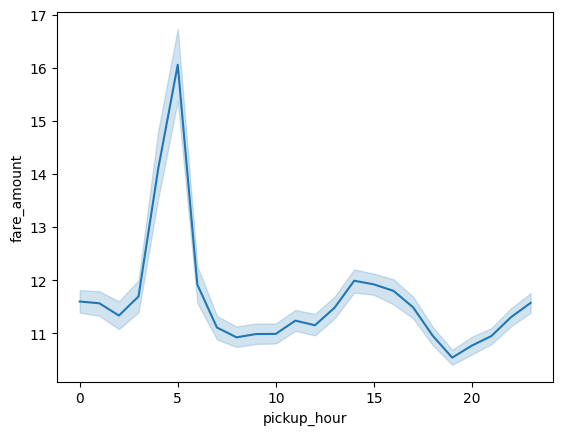

In [18]:
sns.lineplot(data1,x='pickup_hour',y='fare_amount')

In [19]:
pickup_time1={'Early_morning':0,'Day':1,'Evening':2,'Night':3,'Late_Night':4}

data1['pickup_time']=data1.pickup_hour.apply(lambda x: pickup_time1['Early_morning'] if (x>2 and x<=7) else
                                             pickup_time1['Day'] if (x>7 and x<=12) else
                                             pickup_time1['Evening'] if (x>12 and x<=19) else
                                             pickup_time1['Night'] if (x>19 and x<=23) else
                                             pickup_time1['Late_Night'] if (x>=0 and x<=2) else x)

In [20]:
data1['pickup_time'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [21]:
data1.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance(miles),pickup_year,pickup_hour,is_weekend,pickup_time
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.046033,2015,19,0,2
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,1.527170,2009,20,0,3
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,3.129653,2009,21,0,3
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.032586,2009,8,0,1
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2.781087,2014,17,0,2


In [22]:
#we can drop these columns as we don't need them anymore for model building
data2=data1.drop(['pickup_datetime'],axis=1)


In [23]:

data2.corr()['fare_amount']

fare_amount          1.000000
pickup_longitude     0.015380
pickup_latitude     -0.012303
dropoff_longitude    0.017335
dropoff_latitude    -0.014471
passenger_count      0.012531
distance(miles)      0.026454
pickup_year          0.120472
pickup_hour         -0.020514
is_weekend          -0.000194
pickup_time         -0.011581
Name: fare_amount, dtype: float64

In [24]:
data2=data2[data2['distance(miles)']<=90]


In [25]:
data3=data2[data2['distance(miles)']<1]
fare_avg=np.mean(data3['fare_amount'])
print(fare_avg)

6.109517145369284


In [26]:
data2 = data2[~((data2['fare_amount'] <= 6) & (data2['distance(miles)'] >= 15))]
data2=data2[~((data2['distance(miles)']<1)& (data2['fare_amount']>55))]
data2=data2[data2['distance(miles)']>0.1]
data2.shape


(192346, 11)

In [27]:
from scipy import stats #remove outlier with z_score
z_score=np.abs(stats.zscore(data2))
threshold=3
data_clean=data2[(z_score<threshold).all(axis=1)]
data_clean.shape

(182347, 11)

In [28]:
# data_clean=data2
# data_clean.shape

In [29]:
data_clean.corr()['fare_amount']

fare_amount          1.000000
pickup_longitude     0.217254
pickup_latitude     -0.044320
dropoff_longitude    0.274503
dropoff_latitude    -0.071737
passenger_count      0.006027
distance(miles)      0.876279
pickup_year          0.130652
pickup_hour         -0.022032
is_weekend           0.005029
pickup_time          0.015644
Name: fare_amount, dtype: float64

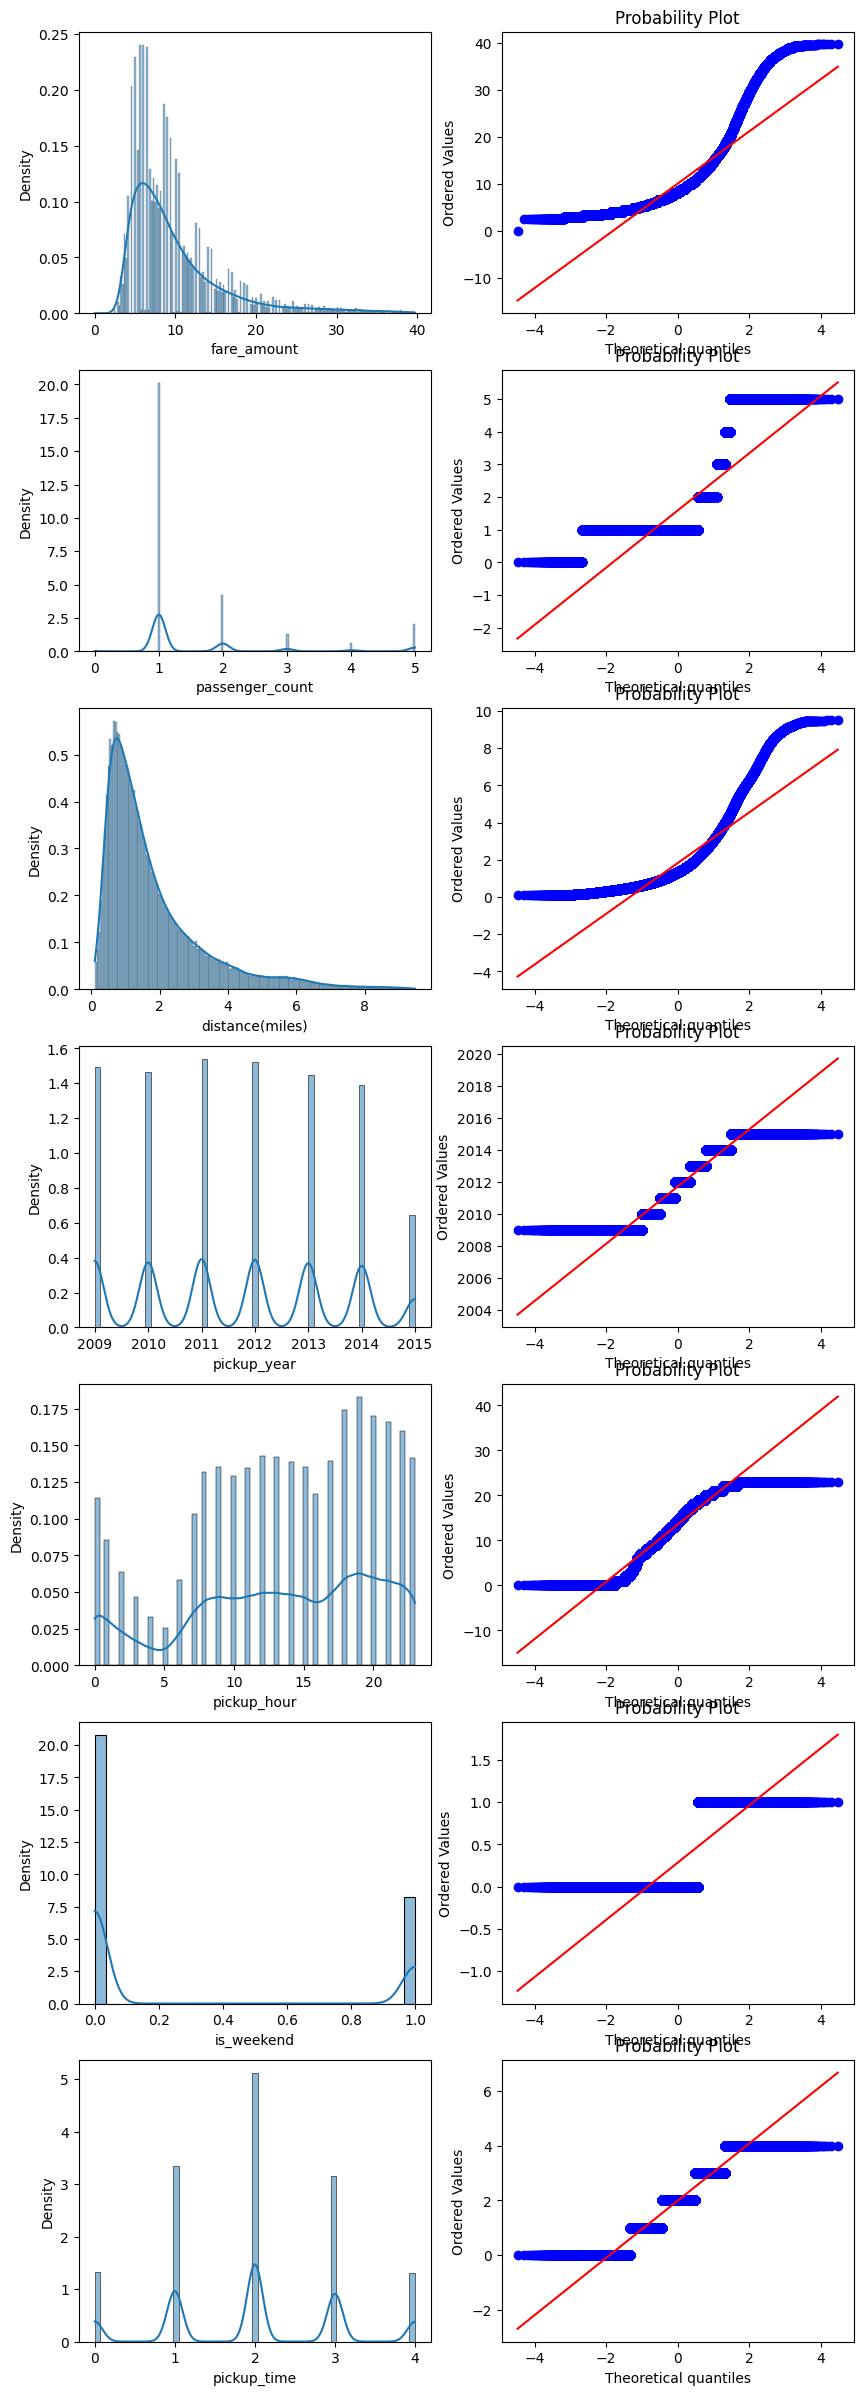

In [30]:
#plt.figure(figsize=(10,4))

fig, axes = plt.subplots(7, 2, figsize=(10,30))
sns.histplot(data_clean['fare_amount'],stat='density',kde=True,ax=axes[0,0])
stats.probplot(data_clean['fare_amount'],dist='norm',plot=axes[0,1])


sns.histplot(data_clean['passenger_count'],stat='density',kde=True,ax=axes[1,0])
stats.probplot(data_clean['passenger_count'],dist='norm',plot=axes[1,1])


sns.histplot(data_clean['distance(miles)'],stat='density',kde=True,ax=axes[2,0])
stats.probplot(data_clean['distance(miles)'],dist='norm',plot=axes[2,1])


sns.histplot(data_clean['pickup_year'],stat='density',kde=True,ax=axes[3,0])
stats.probplot(data_clean['pickup_year'],dist='norm',plot=axes[3,1])


sns.histplot(data_clean['pickup_hour'],stat='density',kde=True,ax=axes[4,0])
stats.probplot(data_clean['pickup_hour'],dist='norm',plot=axes[4,1])


sns.histplot(data_clean['is_weekend'],stat='density',kde=True,ax=axes[5,0])
stats.probplot(data_clean['is_weekend'],dist='norm',plot=axes[5,1])


sns.histplot(data_clean['pickup_time'],stat='density',kde=True,ax=axes[6,0])
stats.probplot(data_clean['pickup_time'],dist='norm',plot=axes[6,1])
plt.show()



In [31]:
data_clean.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance(miles),pickup_year,pickup_hour,is_weekend,pickup_time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.046033,2015,19,0,2
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,1.527170,2009,20,0,3
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,3.129653,2009,21,0,3
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.032586,2009,8,0,1
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2.781087,2014,17,0,2


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PowerTransformer,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [33]:
x_train,x_test,y_train,y_test=train_test_split(data_clean.drop(['fare_amount'],axis=1),data_clean['fare_amount'],test_size=0.20,random_state=42)

In [34]:
transformer1=ColumnTransformer([
    ('yeo',PowerTransformer(method='yeo-johnson'),[5,7])
])

In [35]:
x_train1=transformer1.fit_transform(x_train)
x=pd.DataFrame(x_train1,columns=['distance(miles)','pickup_hour'])


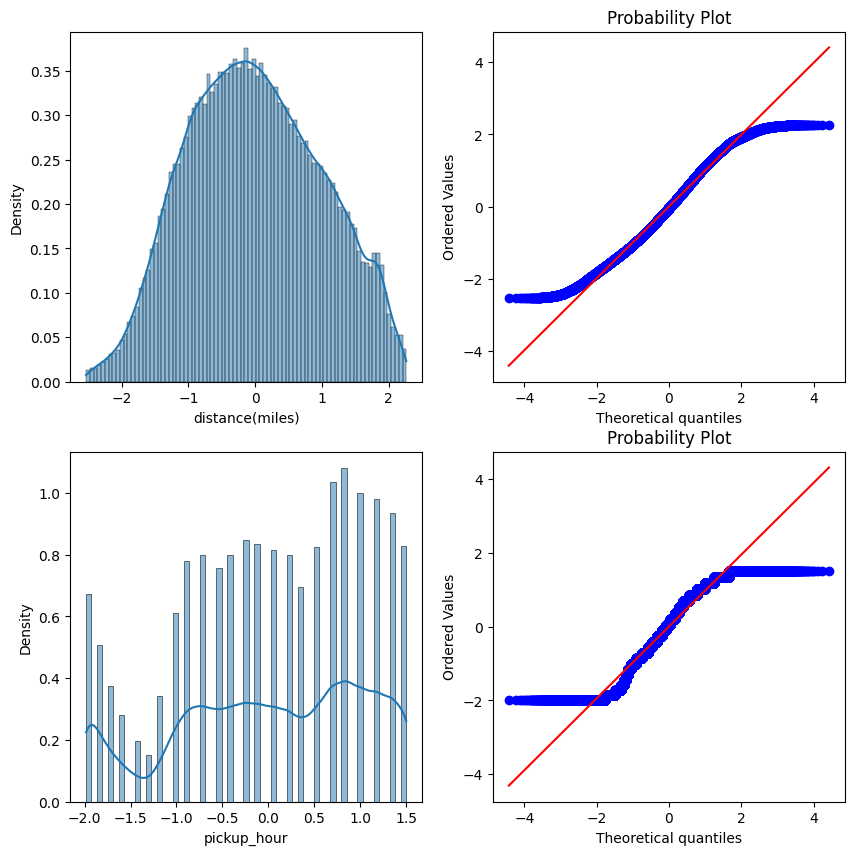

In [36]:
#plt.figure(figsize=(10,4))

fig, axes = plt.subplots(2, 2, figsize=(10,10))

sns.histplot(x['distance(miles)'],stat='density',kde=True,ax=axes[0,0])
stats.probplot(x['distance(miles)'],dist='norm',plot=axes[0,1])




sns.histplot(x['pickup_hour'],stat='density',kde=True,ax=axes[1,0])
stats.probplot(x['pickup_hour'],dist='norm',plot=axes[1,1])


plt.show()



In [37]:
x_train.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance(miles),pickup_year,pickup_hour,is_weekend,pickup_time
76892,-73.977499,40.758196,-73.965185,40.758332,1,0.644576,2009,19,1,2
146577,-73.953725,40.775285,-73.989750,40.714112,5,4.628542,2011,15,0,2
182554,-73.990177,40.760708,-73.952990,40.770273,5,2.055298,2011,3,1,0
67776,-73.970980,40.756422,-73.974740,40.761890,1,0.426005,2012,16,0,2
195798,-73.983649,40.738477,-73.978322,40.744752,1,0.515532,2009,12,1,1


In [38]:
transformer=ColumnTransformer([
    ('yeo',PowerTransformer(method='yeo-johnson'),[0,1,2,3,5,7])
],remainder='passthrough')
ohe=ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='error'),[8,9])

],remainder='passthrough')


scale=ColumnTransformer([
    ('scaler',StandardScaler(),[0,1,2,3,4,5,6,7,8,9,10,11,12])
],remainder='passthrough')


In [39]:
pipe=make_pipeline(transformer,ohe,scale)

In [40]:
x_train_tr=pipe.fit_transform(x_train)
x_test_tr=pipe.transform(x_test)


poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train_tr)
x_test_poly=poly.transform(x_test_tr)

In [41]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error


In [42]:
lr=LinearRegression()
lasso=Lasso(alpha=0.01)
ridge=Ridge(alpha=0.01,solver='auto')
tree=DecisionTreeRegressor()


In [96]:
lr.fit(x_train_poly,y_train)
y_pred=lr.predict(x_test_poly)
print('R2 Score is',r2_score(y_test,y_pred))
mean_squared_error(y_test,y_pred)

R2 Score is 0.8220467825652833


6.569392743646755

In [97]:
ridge.fit(x_train_poly,y_train)
y_pred_ridge=ridge.predict(x_test_poly)
print('R2 Score is',r2_score(y_test,y_pred_ridge))
mean_squared_error(y_test,y_pred_ridge)

R2 Score is 0.8220523548721477


6.56918703411923

In [45]:
#lasso.fit(x_train_poly,y_train)
#y_pred_lasso=lasso.predict(x_test_poly)
#print('R2 Score is',r2_score(y_test,y_pred_lasso))

In [84]:
tree.fit(x_train_tr,y_train)
y_pred_tree=tree.predict(x_test_tr)
print('R2 Score is',r2_score(y_test,y_pred_tree))
mean_squared_error(y_test,y_pred_tree)

R2 Score is 0.6923278163376136


11.358150416780916

In [47]:
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,GradientBoostingRegressor,VotingRegressor,GradientBoostingRegressor
import xgboost as xgb

In [171]:
params = {           
    'eta': 0.2,                         
    'max_depth': 5,                     
    'subsample': 0.99,                   
    'colsample_bytree': 0.7,            
    'gamma': 0.1,                       
    'reg_lambda': 15,                    
    'reg_alpha': 4,                     
    'n_estimators': 650,                
}
xgb_reg=xgb.XGBRegressor(**params)
xgb_reg.fit(x_train_tr,y_train)
y_pred_xg=xgb_reg.predict(x_test_tr)
print('R2 Score',r2_score(y_test,y_pred_xg))
print('Mean Squared Error',mean_squared_error(y_pred_xg,y_test))

R2 Score 0.8645743911000678
Mean Squared Error 4.999426395521827


In [173]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_reg,x_train_tr,y_train,cv=5,scoring='r2')
print(score)
print('Cross Validation Score',np.mean(score))

[0.87128188 0.86136317 0.86509902 0.87230532 0.86883015]
Cross Validation Score 0.8677759080551052


In [87]:
gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=50,n_iter_no_change=5)
gb.fit(x_train_tr,y_train)
y_pred_gb=gb.predict(x_test_tr)
print('R2 Score',r2_score(y_test,y_pred_gb))

R2 Score 0.8278171886522709


In [89]:
rf=RandomForestRegressor(n_estimators=100,n_jobs=-1)
rf.fit(x_train_tr,y_train)
y_pred_rf=rf.predict(x_test_tr)
print('R2 Score',r2_score(y_test,y_pred_rf))

R2 Score 0.850988013219496


In [91]:
estimators=[('rf',rf),('gb',gb),('xgb2',xgb_reg),('rf1',rf),('xgb4',xgb_reg),('gb1',gb)]

In [94]:
vc=VotingRegressor(estimators=estimators,n_jobs=-1)
vc.fit(x_train_tr,y_train)
y_pred_vc=vc.predict(x_test_tr)
print('R2 Scorce',r2_score(y_pred_vc,y_test))

R2 Scorce 0.824453981339248


In [95]:
sc=StackingRegressor(estimators=estimators,final_estimator=xgb_reg,n_jobs=-1)
sc.fit(x_train_tr,y_train)
y_pred_sc=sc.predict(x_test_tr)
print('R2 Scorce',r2_score(y_pred_sc,y_test))

R2 Scorce 0.8400358000523085


### XGBRegressor Performed well with cross_val_score 0.8677